# Employee Turnover Case Analysis


## Project Aim

Using the employee database provided from a human capital department of a large corporation, I will try to find ways to reduce the number of employees leaving the company.

After understanding the situation better, I will try to analyse:
1. Which employees are more likely to leave and why, and
2. Find variables which impact employee churn, and
3. Come up with findings and recommendations on ways to solve the problem.

## The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv('employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


## Data preparation
In order to study and explore the data properly, the dataset must be carefully prepared and cleaned.

In [2]:
#Checking for missing values
df.isnull().any()

department       False
promoted         False
review           False
projects         False
salary           False
tenure           False
satisfaction     False
bonus            False
avg_hrs_month    False
left             False
dtype: bool

There is no preseance of missing values, therefore no need for missing values imputation.

For better understanding of the data, we will change the "no" in left column to 0 and "yes" to 1.

In [3]:
df['left'].replace('no', 0, inplace=True)
df['left'].replace('yes', 1, inplace=True)

## Data Exploration
In order to study the dataset and find the answers to the increased employee turnover, the dataset must be thoroughly explored.

In [4]:
#Checking the overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 745.4+ KB


- There are 9540 entries in the dataset.
- There are 10 variables in the dataset.
- The columns 'department' and 'salary' are the categorical variables.

### Calculating the turnover_rate based on the column "left".

In [5]:
turnover_rate = df.left.value_counts()/len(df)
turnover_rate

0    0.708176
1    0.291824
Name: left, dtype: float64

Looks like about 71% of the employees stayed and about 29% of the employees left.

In [6]:
#Statistical Overview of the employee turnover dataset
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571,0.291824
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831,0.454626
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060,0.000000
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085,0.000000
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796,0.000000
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708,1.000000
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656,1.000000


### Turnover Summary 

In [7]:
turnover_summary = df.groupby('left')
turnover_summary.mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
left,,,,,,,
0,0.034340,0.635164,3.279455,6.546625,0.505634,0.215068,184.637605
1,0.020474,0.692262,3.263649,6.579382,0.502244,0.204741,184.719730


Based on turnover summary, it can be seen that the employees who got promoted did not leave, whereas the employees that did not get promoted left.

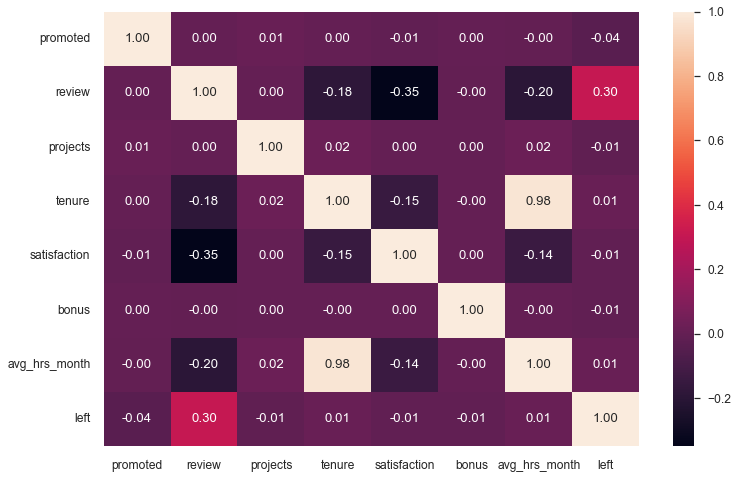

In [8]:
#Correlation Matrix and Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
sns.set(font_scale=1.1)
sns.heatmap(df.corr(), annot=True, fmt='.2f');

## Findings from the correlation Matrix and Heatmap

### Positively Correlated Features: 

- review vs left: 0.304294
- tenure vs avg_hrs_month: 0.978618

### Negatively Correlated Features: 
- review vs satisfaction: -0.349778


### Summary

From the heatmap, there is a positive(+) correlation between review, left, tenure and avg_hrs_month. This can be interpreted as:

- The employees decided to leave or stay based on the review they recieved.
- The avg_hrs_month is definitely high for the employees working for more number of years.

For the negative(-) correlation the review and satisfaction are highly correlated. This can be interpreted as:
- The employees were not satisfied with the reviews they received. 

### Statistical Test for Correlation

#### One-Sample T-Test (Measuring review Level)
A one-sample t-test checks whether a sample mean differs from the population mean. Since review has the highest correlation with our dependent variable left, let's test to see whether the average review level of employees that had left differs from the those that did not left.

**Hypothesis Testing:** Is there significant difference in the **means of review level** between employees that had left froom those that did not.

- **Null Hypothesis:** The null hypothesis would be that there is **no** difference in review level between employees who stayed and who left..
- **Alternate Hypothesis:** The alternative hypothesis would be that **there is** a difference in review level between employees who stayed and who left..


In [9]:
# Let's compare the means of our employee left review against the employee population review
emp_population = df['review'][df['left'] == 0].mean()
emp_turnover_review = df[df['left']==1]['review'].mean()

print( 'The mean review for the employee population who did not leave is: ' + str(emp_population))
print( 'The mean review for employees that had left is: ' + str(emp_turnover_review) )

The mean review for the employee population who did not leave is: 0.635163672768492
The mean review for employees that had left is: 0.6922619851915817


### Conducting the T-Test
Let's conduct a t-test at 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population. To conduct a one sample t-test, we can use the stats.ttest_1samp() function:

In [10]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['left']==1]['review'], # Sample of Employee review who had a Turnover 
                  popmean = emp_population)  # Employee Who Had No Turnover review mean

Ttest_1sampResult(statistic=31.59278288897046, pvalue=1.7875413653279587e-187)

### T-Test Result
The test result shows the test statistic "t" is equal to 31.59. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

### T-Test Quantile
If the t-statistic value we calculated above (31.59) is outside the quantiles, then we can reject the null hypothesis

In [11]:
degree_freedom = len(df[df['left']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.960816457740003
The t-distribution right quartile range is: 1.9608164577400025


### One-Sample T-Test Summary 

**T-Test = 31.59 | P-Value = 1.78e-187 (close to zero) | Reject Null Hypothesis**

**Reject the null hypothesis because:**

- T-Test score is outside the quantiles
- P-value is less than confidence level of 5% </br>
Based on the statistical analysis of a one sample t-test, there seems a significant difference between the mean review of employees who had a turnover and the entire employee population. The super low P-value of 1.78e-187 at a 5% confidence level is a good indicator to reject the null hypothesis.

## Distribution Plots (Satisfaction - Review - Average Monthly Hours)

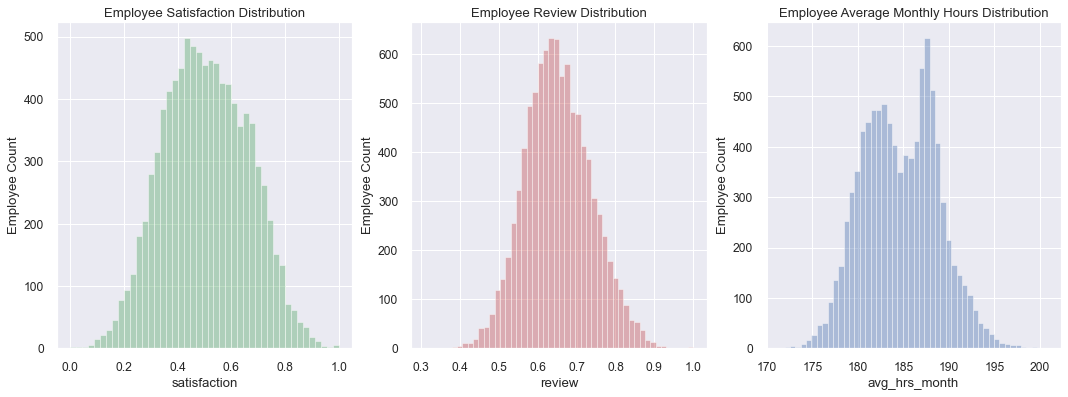

In [12]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(18, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Review
sns.distplot(df.review, kde=False, color="r", ax=axes[1]).set_title('Employee Review Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.avg_hrs_month, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count');

**Summary:** Let's examine the distribution on some of the employee's features. Here's what I found:

- **Satisfaction** - There is a huge spike for employees with mean satisfaction (between 0.4 to 0.6).
- **Review** - There is a huge spike for employees for mean review (between 0.6 to 0.8)
- **AverageMonthlyHours** - There is bimodal distribution of employees with lower and higher average monthly hours (less than 180 hours & more than 185 hours)
- The review and satisfaction graphs both share a similar distribution.
- Employees with high review were highly satisfied and vice versa.
- If you look back at the correlation matrix, the negative high correlation between review and satisfaction does support this finding.

## Salary VS Left

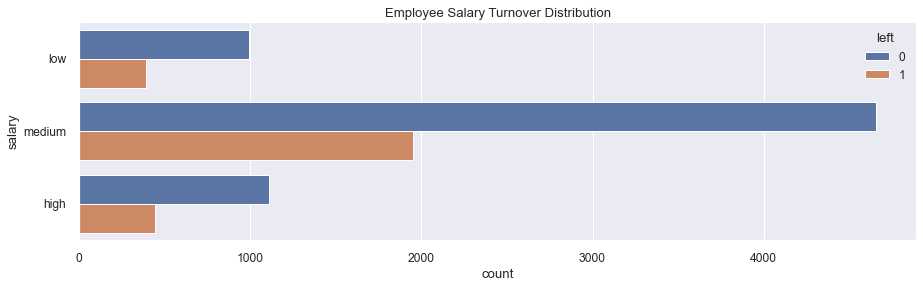

In [13]:
plt.figure(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=df).set_title('Employee Salary Turnover Distribution');

**Summary:**
    
   Employees with different salaries are more or less leaving the company in similar proportions.

**Thoughts:**

- What is the work environment like for low, medium, and high salaries?
- What made employees with high salaries to leave?

## Department VS left

In [14]:
df['department'].unique()

array(['operations', 'support', 'logistics', 'sales', 'IT', 'admin',
       'engineering', 'marketing', 'finance', 'retail'], dtype=object)

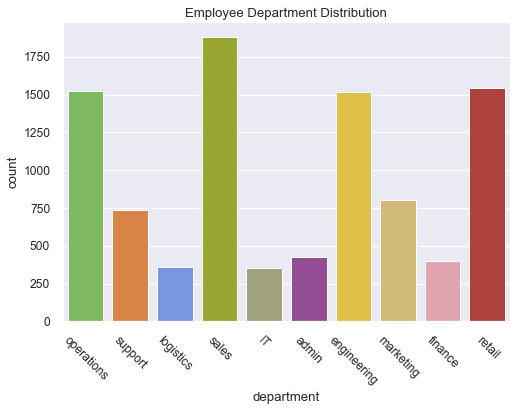

In [15]:
# Employee distribution
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45);

Operation, Sales, Engineering and Retail departments had the most number of employees. The Sales department was the highest and the logistics and IT department were the lowest.

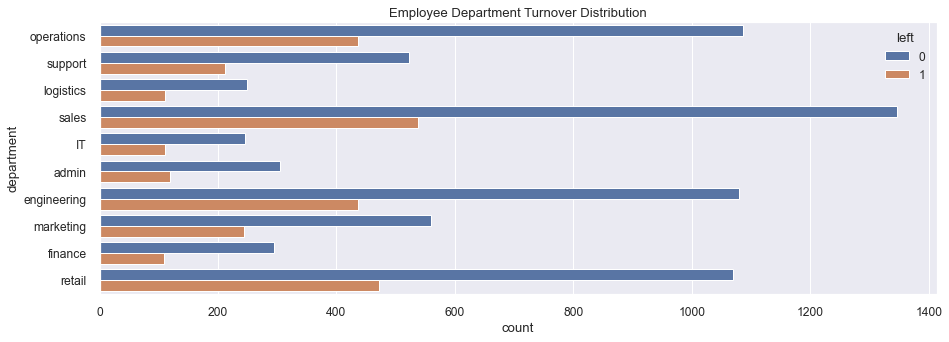

In [16]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='left', data=df).set_title('Employee Department Turnover Distribution');

**Summary:** Let's see more information about the departments. Here's what I found:

The sales, retail, and engineering department were the top 3 departments to have employee turnover
The IT department had the smallest amount of turnover

**Thoughts:**

If we had more information on each department, can we pinpoint a more direct cause for employee turnover?

## Project VS Left

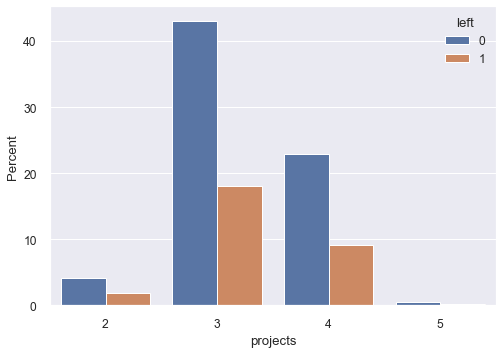

In [17]:
sns.barplot(x="projects", y="projects", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel("Percent");

**Summary:** This graph is quite interesting as well. Here's what I found:

- More than half of the employees with 3 and 4 projects left the company
- Majority of the employees who did not leave the company had 2 and 5 projects
- There is an decrease in employee turnover rate as project count increases

**Think:**

- Why are employees leaving at the lower/higher spectrum of project counts?
- Does this means that employees with project counts 2 or less are not having to work hard causing less stress, thus not leaving the company?
- Do employees with 3+ projects are getting overworked, thus leaving the company?

## Left VS Review

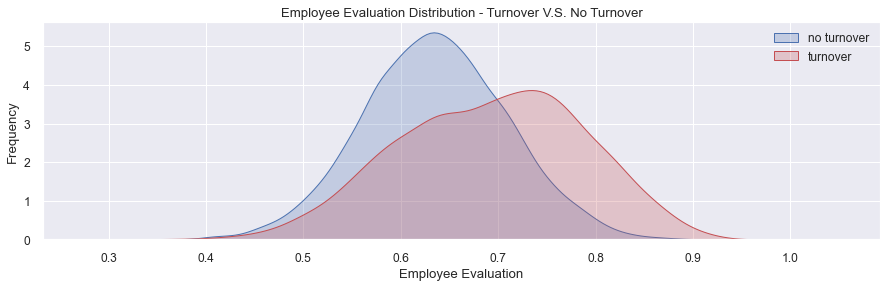

In [18]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'review'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'review'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')
plt.legend();

**Summary:**
- Employees with high performance or review tend to leave the company more.
- Employees that stayed is within 0.5 to 0.7 review.
- There is a normal distribution for no turnover.

## Left VS AverageMonthlyHours

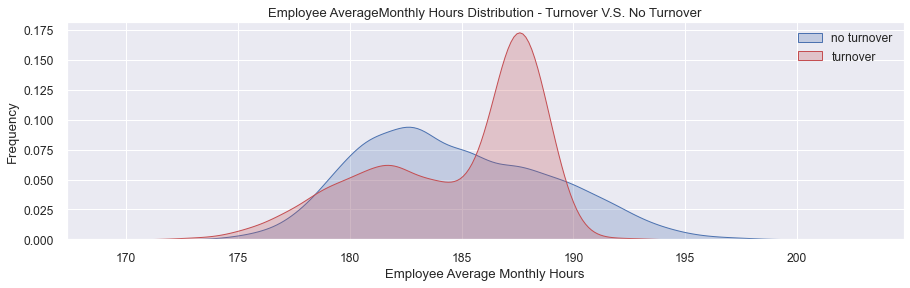

In [19]:
#Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'avg_hrs_month'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'avg_hrs_month'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')
plt.legend();

**Summary:**
- Employees who left generally were overworked.

## Left VS Satisfaction

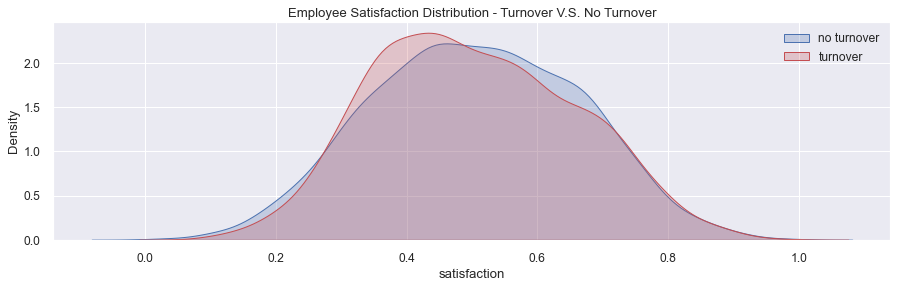

In [20]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')
plt.legend();

**Summary:**
- Employees turnover does not depand on whether they were satisfied or not.

## ProjectCount VS AverageMonthlyHours

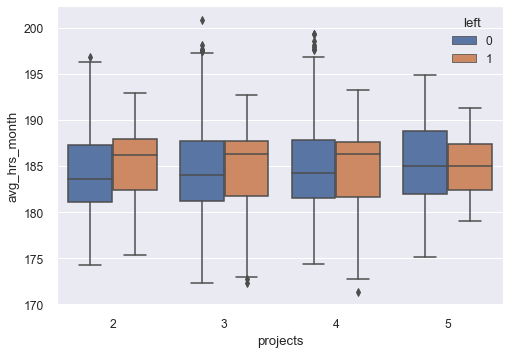

In [21]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 190 hours/month. Those that had a turnover worked about 250hours/month and 185 hours/month

sns.boxplot(x="projects", y="avg_hrs_month", hue="left", data=df);

**Summary:** 
- Employees with 3 to 4 projects worked more on an average per month.
- Main point here is the employees who stayed or left worked almost the same numbers of hours on an average per month.

## Project VS Review

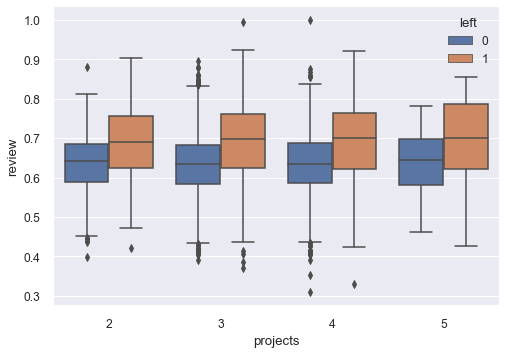

In [22]:
#ProjectCount VS Review
#Looks like employees who did not leave the company had an average review of around 70% even with different projectCounts
#There is a skew in employees who had a turnover though. It changes for the case of 5 projects. 

sns.boxplot(x="projects", y="review", hue="left", data=df);

**Summary:**
- Employees left despite having high review for 5 projects. This can be due to the workload of handling many projects at the same time.

**Thoughts:**
- Shouldn't employees with lower evaluations tend to leave the company more?
- Or maybe getting good reviews tends to make them feel they are too good for the company and leave? Interesting!


## Left V.S. Tenure

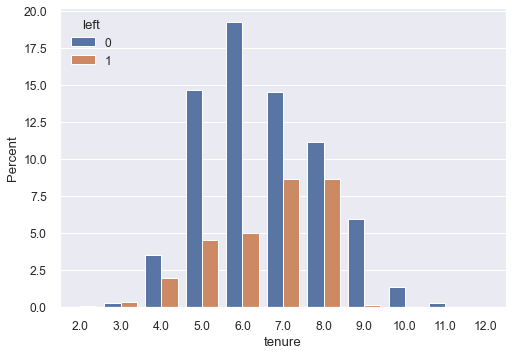

In [23]:
sns.barplot(x="tenure", y="tenure", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel("Percent");

**Summary:**
- Employees who have worked for 7 to 8 years had left more.
- All the other employees with less than 7 or greater than 8 years of work tend to stay.

## Left vs Promoted

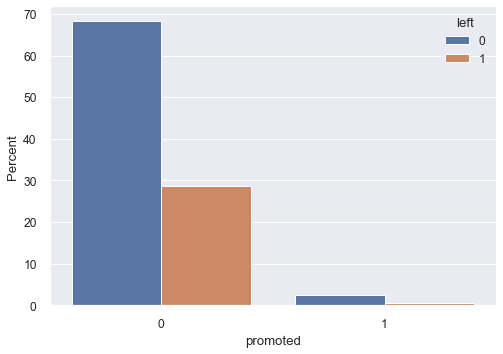

In [24]:
sns.barplot(x="promoted", y="promoted", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel("Percent");

**Summary:**
- The turnover was high for those who did not get promoted.

# Conclusion

Based on several findings and exploration of the dataset, we can conclude the following:
- Employees with high review were highly satisfied and vice versa.
- Majority of employees who left had medium salary.
- The sales, retail, and engineering department were the top 3 departments to have employee turnover. The IT department had the smallest amount of turnover.
- Review variable turned out to be the better predictor for employee turnover.
- Employees with 3 and 4 projects left the company.
- Employees with high performance or review tend to leave the company more.
- Employees who left generally were overworked.
- Main point here is the employees who stayed or left worked almost the same numbers of hours on an average per month.
- Employees left despite having high review for 5 projects. This can be due to the workload of handling many projects at the same time.
- Employees between 7 to 8 years of work left more.
- Employees who did not get promoted left more.







# Recommendations:
- Even though the employees with high review were highly satisfied but with 5 projects or more left the company. This is can be due to overworking. The solution to this can be providing better work life balance. Providing a supportive team to carry out the project. Motivate the employees more by giving high incentives or bonus.
- Since the departments - sales, retail and engineering had the highest turnover rate, a more thorough investigation must be done as to why this was happening.
- Some employees left despite the high review. This could have been because the employees did not recieve the good amount of salary or incentives despite their excellent performances. Therefore, increasing the salary or giving extra benefits or motivation to high performing employees can result in decreased turnover.
- Employees who were highly experienced i.e., 7 to 8 years of work, left more. With high experience the employees could have got better options of work in some other places. Therefore, doing an in depth study of why highly experienced employees left could result in decreased turnover.

